# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?

Below I've set up an outline of a notebook for this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [19]:
import pandas as pd
path = "/Users/christyhe/Documents/Data_Scientist/udemy-data-science-deep-learning/"

In [93]:
header = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']
df = pd.read_csv(path + 'mammographic_masses.data.txt',
                na_values=['?'],
                names=header)
df.head()

BI_RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1

Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [94]:
df.describe()

BI_RADS         age       shape      margin     density    severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

In [95]:
df.loc[(df['age'].isnull()) | (df['shape'].isnull()) | (df['margin'].isnull())
       | (df['density'].isnull())]

BI_RADS   age  shape  margin  density  severity
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
9        5.0  60.0    NaN     5.0      1.0         1
12       4.0  64.0    1.0     NaN      3.0         0
19       4.0  40.0    1.0     NaN      NaN         0
20       NaN  66.0    NaN     NaN      1.0         1
22       4.0  43.0    1.0     NaN      NaN         0
26       2.0  66.0    1.0     1.0      NaN         0
27       5.0  63.0    3.0     NaN      3.0         0
35       4.0  77.0    3.0     NaN      NaN         0
38       4.0  48.0    4.0     5.0      NaN         1
40       4.0  59.0    2.0     1.0      NaN         0
43       4.0  61.0    2.0     1.0      NaN         0
45       5.0  44.0    2.0     4.0      NaN         1
47       4.0  23.0    1.0     1.0      NaN         0
48       2.0  42.0    NaN     NaN      4.0         0
52       4.0  23.0    1.0     1.0      NaN         0
53       4.0  63.0    2.0     1.0      NaN         0
54       4.0  53.0    NaN     5.0      3.0         1
55       4.0  43.0    3.0     4.0      NaN         0
57       5.0  51.0    2.0     4.0      NaN         0
58       4.0  45.0    2.0     1.0      NaN         0
59       5.0  59.0    2.0     NaN      NaN         1
63       3.0  57.0    2.0     1.0      NaN         0
65       4.0  25.0    2.0     1.0      NaN         0
67       5.0  72.0    4.0     3.0      NaN         1
74       5.0  70.0    NaN     4.0      NaN         1
..       ...   ...    ...     ...      ...       ...
496      4.0  82.0    NaN     5.0      3.0         1
501      5.0  59.0    4.0     4.0      NaN         1
519      3.0  68.0    NaN     NaN      3.0         0
520      4.0  62.0    4.0     NaN      3.0         1
521      5.0  65.0    1.0     NaN      3.0         1
531      4.0  55.0    NaN     NaN      3.0         0
537      5.0  63.0    NaN     4.0      3.0         1
541      4.0  49.0    2.0     NaN      3.0         0
554      5.0  70.0    NaN     5.0      3.0         1
561      2.0  59.0    NaN     4.0      3.0         0
569      4.0  64.0    3.0     4.0      NaN         1
574      4.0  60.0    3.0     NaN      NaN         0
581      2.0  65.0    NaN     1.0      2.0         0
614      3.0  46.0    NaN     5.0      NaN         1
627      4.0  57.0    2.0     1.0      NaN         0
660      4.0  58.0    NaN     4.0      3.0         1
661      4.0  51.0    NaN     4.0      3.0         0
662      3.0  50.0    NaN     NaN      3.0         1
665      4.0  27.0    2.0     1.0      NaN         0
677      4.0  57.0    4.0     4.0      NaN         1
683      5.0   NaN    3.0     3.0      3.0         1
691      4.0  72.0    3.0     NaN      3.0         0
723      4.0  60.0    3.0     NaN      4.0         0
745      6.0  76.0    3.0     NaN      3.0         0
752      5.0  48.0    NaN     4.0      NaN         1
778      4.0  60.0    NaN     4.0      3.0         0
819      4.0  35.0    3.0     NaN      2.0         0
824      6.0  40.0    NaN     3.0      4.0         1
884      5.0   NaN    4.0     4.0      3.0         1
923      5.0   NaN    4.0     3.0      3.0         1

[130 rows x 6 columns]

df.loc[(df['age'].isnull()) | (df['shape'].isnull()) | (df['margin'].isnull())
       | (df['density'].isnull()) | (df['severity'].isnull())]

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [96]:
df.dropna(inplace=True)
df.describe()

BI_RADS         age       shape      margin     density    severity
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [98]:
feature_names = ['age', 'shape', 'margin', 'density']
features = df[feature_names].values
classes = df[['severity']].values.ravel()

In [99]:
features[:10]

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       [57.,  1.,  5.,  3.],
       [76.,  1.,  4.,  3.],
       [42.,  2.,  1.,  3.],
       [36.,  3.,  1.,  2.],
       [60.,  2.,  1.,  2.],
       [54.,  1.,  1.,  3.],
       [52.,  3.,  4.,  3.]])

In [34]:
classes[:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_feature_scared = scaler.fit_transform(features)
all_feature_scared[:10]

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       [ 0.08307148, -1.43517241,  1.39618483,  0.24046607],
       [ 1.37885518, -1.43517241,  0.75770912,  0.24046607],
       [-0.93991564, -0.62976801, -1.157718  ,  0.24046607],
       [-1.34911049,  0.17563638, -1.157718  , -2.6107745 ],
       [ 0.28766891, -0.62976801, -1.157718  , -2.6107745 ],
       [-0.12152594, -1.43517241, -1.157718  ,  0.24046607],
       [-0.25792422,  0.17563638,  0.75770912,  0.24046607]])

## Decision Trees

Before moving to K-Fold cross validation and random forests, start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [101]:
#All libaries
import numpy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
from pydotplus import graph_from_dot_data


In [103]:
(train_x, test_x, train_y, test_y) = train_test_split(
    all_feature_scared, classes, train_size=0.8, random_state=1)

/Users/christyhe/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Now create a DecisionTreeClassifier and fit it to your training data.

In [104]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Display the resulting decision tree.

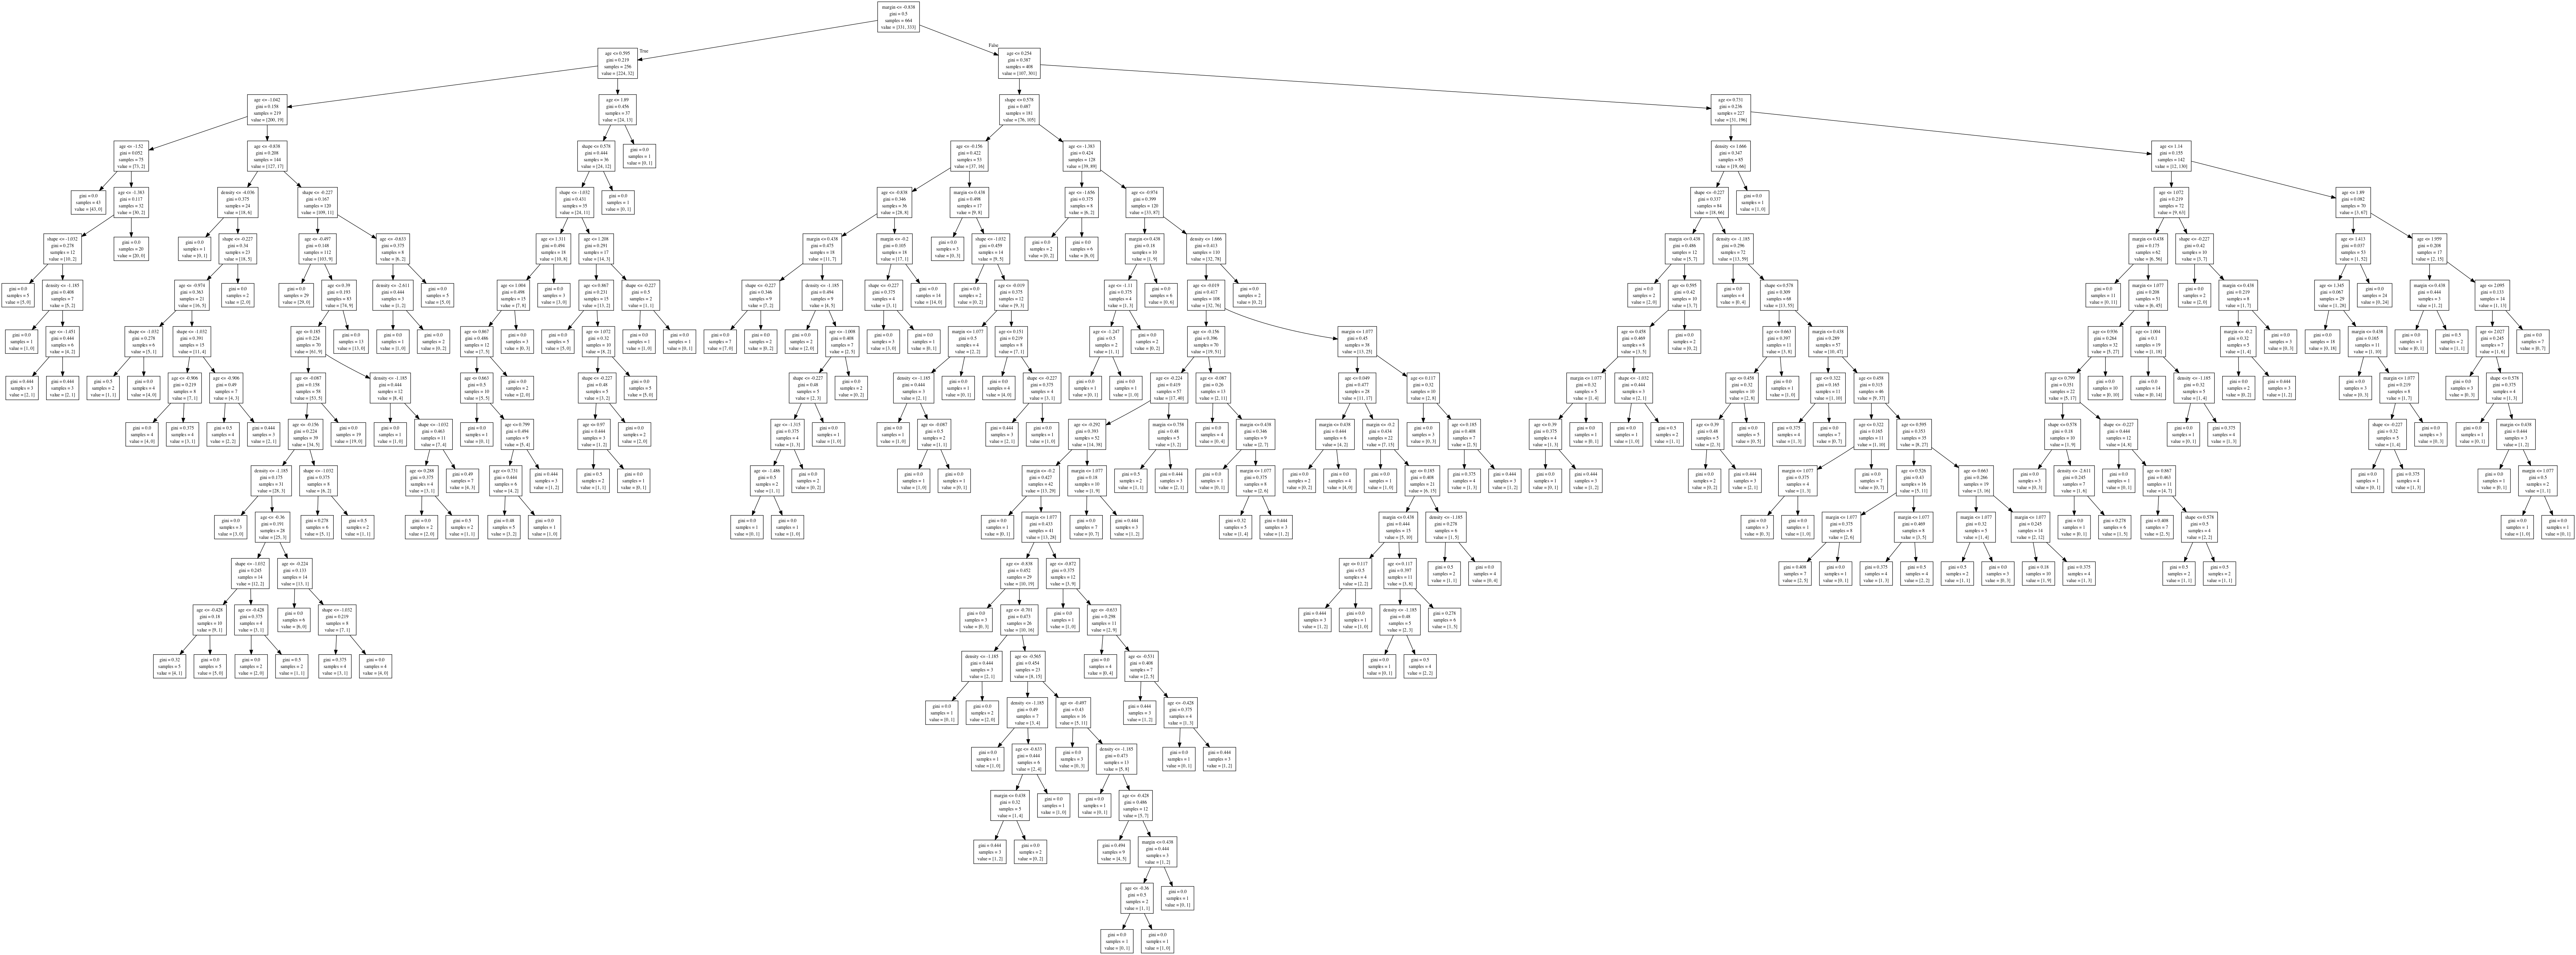

In [105]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Measure the accuracy of the resulting decision tree model using your test data.

In [ ]:
# Model                         Score
# Decision Treee                0.77
# K-Fold Cross Validation       0.74
# Random Forest                 0.75
# SVM                           0.80


In [106]:
clf.score(test_x, test_y)
#train size score
#75%        0.7356
#80%        0.7771

0.7771084337349398

In [107]:
def print_cv_score(cv_score):
    print ("================all cv scores==============")
    print(cv_score)
    print("=================max score===================")
    print(cv_score.max())
    print("==================min score===================")
    print(cv_score.min())
    print("===================mean score=================")
    print(cv_score.mean())

Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). Hint: use model_selection.cross_val_score

In [108]:
clf_k = DecisionTreeClassifier(random_state=1)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)

In [109]:
#K fold validation for Decision Tree
print_cv_score(cv_score)

================all cv scores==============
[0.71428571 0.76190476 0.73809524 0.73493976 0.78313253 0.69879518
 0.72289157 0.76829268 0.75609756 0.69512195]
=================max score===================
0.7831325301204819
==================min score===================
0.6951219512195121
===================mean score=================
0.7373556945552244


Now try a RandomForestClassifier instead. Does it perform better?

In [110]:
clf_r = RandomForestClassifier(n_estimators=10, random_state=1)
cv_score = cross_val_score(clf_r, all_feature_scared, classes, cv=10)

In [111]:
# Random Forest with k fold validation
print_cv_score(cv_score)

================all cv scores==============
[0.73809524 0.77380952 0.79761905 0.78313253 0.79518072 0.69879518
 0.78313253 0.75609756 0.75609756 0.65853659]
=================max score===================
0.7976190476190477
==================min score===================
0.6585365853658537
===================mean score=================
0.7540496480696304


## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [112]:
from sklearn import svm

In [113]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)

In [114]:
#print cv_score
print_cv_score(cv_score)

================all cv scores==============
[0.71428571 0.77380952 0.86904762 0.80722892 0.84337349 0.69879518
 0.80722892 0.80487805 0.90243902 0.74390244]
=================max score===================
0.9024390243902439
==================min score===================
0.6987951807228916
===================mean score=================
0.7964988875362076


## KNN
How about K-Nearest-Neighbors? Hint: use neighbors.KNeighborsClassifier - it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [120]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [139]:
# tried neighbors from 1 to 50
max_score, neighbor = -1, 0
for x in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=x)
    cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)
    mean_score = cv_score.mean()
    if mean_score > max_score:
        max_score = mean_score
        neighbor = x
        
print ("max score %f" % max_score)
print ("neighbor %d" % neighbor)

max score 0.794060
neighbor 7


## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? Hint: you'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [140]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
all_features_minmax = scaler.fit_transform(features)

In [145]:
#Multinomial NB model
clf = MultinomialNB()
cv_score = cross_val_score(clf, all_features_minmax, classes, cv=10)
print_cv_score(cv_score)

================all cv scores==============
[0.73809524 0.76190476 0.82142857 0.8313253  0.8313253  0.73493976
 0.74698795 0.76829268 0.91463415 0.69512195]
=================max score===================
0.9146341463414634
==================min score===================
0.6951219512195121
===================mean score=================
0.7844055665169388


In [141]:
all_features_minmax.shape

(830, 4)

## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

In [151]:
#user linear
clf = svm.SVC(kernel='linear', C=1.0)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)
print_cv_score(cv_score)

================all cv scores==============
[0.71428571 0.77380952 0.86904762 0.80722892 0.84337349 0.69879518
 0.80722892 0.80487805 0.90243902 0.74390244]
=================max score===================
0.9024390243902439
==================min score===================
0.6987951807228916
===================mean score=================
0.7964988875362076


In [148]:
#use sigmoid
clf = svm.SVC(kernel='sigmoid', C=1.0)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)
print_cv_score(cv_score)

================all cv scores==============
[0.70238095 0.67857143 0.76190476 0.72289157 0.74698795 0.71084337
 0.74698795 0.7804878  0.70731707 0.79268293]
=================max score===================
0.7926829268292683
==================min score===================
0.6785714285714286
===================mean score=================
0.7351055791108685


In [149]:
#use rbf
clf = svm.SVC(kernel='rbf', C=1.0)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)
print_cv_score(cv_score)

================all cv scores==============
[0.75       0.79761905 0.86904762 0.80722892 0.86746988 0.72289157
 0.78313253 0.7804878  0.86585366 0.76829268]
=================max score===================
0.8690476190476191
==================min score===================
0.7228915662650602
===================mean score=================
0.8012023704574396


In [150]:
#use rbf
clf = svm.SVC(kernel='poly', C=1.0)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)
print_cv_score(cv_score)

================all cv scores==============
[0.76190476 0.77380952 0.88095238 0.79518072 0.84337349 0.69879518
 0.77108434 0.79268293 0.86585366 0.74390244]
=================max score===================
0.8809523809523809
==================min score===================
0.6987951807228916
===================mean score=================
0.792753942599667


rbf kernel gives the best result!

## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [153]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)
print_cv_score(cv_score)

================all cv scores==============
[0.76190476 0.76190476 0.88095238 0.81927711 0.8313253  0.71084337
 0.79518072 0.82926829 0.8902439  0.79268293]
=================max score===================
0.8902439024390244
==================min score===================
0.7108433734939759
===================mean score=================
0.8073583532737221


## Neural Networks

As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [154]:
from keras.layers import Dense
from keras.models import Sequential

In [165]:
def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
#     model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; rmsprop seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [167]:
from keras.wrappers.scikit_learn import KerasClassifier
clf = KerasClassifier(build_fn=create_model, nb_epoch=1000, verbose=0)
cv_score = cross_val_score(clf, all_feature_scared, classes, cv=10)

In [168]:
print_cv_score(cv_score)

================all cv scores==============
[0.71084337 0.79518073 0.8313253  0.68674699 0.69879518 0.78313253
 0.48192771 0.81927711 0.8433735  0.73493976]
=================max score===================
0.8433734954121601
==================min score===================
0.4819277129977582
===================mean score=================
0.7385542183037264


## Do we have a winner?

Which model, and which choice of hyperparameters, performed the best? Feel free to share your results!